# Supervised Learning Project: Predicción de distancia en competencias de ultra trail running

## Introducción

### Motivation y Justificación

#### ¿Qué es el running?

El ***running*** es una actividad física que implica desplazar el cuerpo una cierta distancia de manera repetida sobre varios intervalos de tiempo hasta realizar un recorrido. Esto implica la activación de muchos músculos que, dependiendo de la condición física y entrenamiento de la persona y en menor medida de otros factores como el clima y el desnivel, permitirá hacer el recorrido en mayor o menor tiempo. Visto de otra manera permitirá recorrer mayor o menor distancia, en un intervalo de tiempo definido. El *running* se practica por lo general en vias asfaltadas con poco o ningún desnivel por lo que el resultado de la actividad es muy **predecible** basado en la condición física de la persona y entrenamiento.

![image](/home/eaguayo/workspace/ml-project/images/running.png)
*Generated with ChatGPT with prompt "Generate an image of a runner athlete running on a street, viewed from the side with an image of an analog stopwatch above his head, and a ghosted image of the same runner about 10 meters ahead with the stopwatch above his head having advanced a few seconds. Draw a metered line below the runner and it's ghosted image indicating the displaced space between them."*

#### ¿Qué es el trail running?

El ***trail running*** es una actividad física al igual que el *running*, implica desplazar el cuerpo una distancia de manera repetida pero que se diferencia del *running* en que la actividad se realiza usualmente en senderos y caminos de tercer orden. La actividad del **trail running** implica muchas condiciones que cambian durante el transcurso de la actividad (morfología del terreno, desnivel, condiciones climáticas) que dificultan predecir el resultado de la actividad. Estas variables adicionales representan un desafío para una planificación estratégica que maximice el rendimiento del deportista durante el recorrido.

![image](/home/eaguayo/workspace/ml-project/images/trail-running.png)
*Generated with ChatGPT with prompt "Generate an image consisting on 2 images side-by-side. On the left hand side, draw a trail runner viewed from the side power walking uphill on a mountain trail on a steep hill on a sunny day with clear sky. On the right hand side, draw the same trail runner using a rain jacket, running downhill on a rocky trail on a rainy day with cloudy sky."*

#### ¿Qué es el *ultra* trail running?

El ***ultra trail running*** es una actividad de *ultra resistencia*, que se entiende como una actividad que tiene una duración de más de 4 horas, pudiendo extenderse a varios días incluso. Algunas fuentes(https://www.dynafit.com/what-is-trail-running) definen a la actividad por su distancia, superando la distancia de una maraton (42.195 km) y que en el caso del *trail running*, es común que realizar recorridos que superen esta distancia supere también las 4 horas pero dependerá del desnivel y de la capacidad del atleta.

En el *ultra trail running*, las condiciones climáticas, entre otros factores externos, tienen una mayor probabilidad de cambiar debido a la prolongada duración de la actividad teniendo que por lo general ajustar la estrategia sobre la marcha. A diferencia de deportes de resistencia o de corta duración, los deportes de ultra resistencia presentan un desafío adicional debido a los cambios fisiológicos que sufre el cuerpo del atleta durante la práctica prolongada de la actividad. El gasto energético constante y la pérdida de electrolitos tienden a generar un déficit que tiene que ser compensado con cierta frecuencia por lo que la nutrición, antes y durante la actividad, es importante para obtener un buen resultado. El ritmo o intensidad a la que se lleva a cabo la actividad también tiene que ser moderada para evitar la acumulación execisva de ácido láctico que puede llevar a niveles de fatiga exesivos e ir en contra del desempeño del deportista. 

#### ¿Por qué es importante?

En la práctica del *ultra trail running* es importante tener una noción del tiempo estimado en que tomará realizar un recorrido, este se estima usualmente con un gran margen de error en base a experiencias anteriores en recorridos similares. Es común tomar este tiempo estimado para realizar una planificación estratégica que, sobre todo a nivel competitivo, permitirá máximizar los resultados, es decir, poder realizar el recorrido en el menor tiempo posible.

El *trail running* y sobre todo el *ultra trail running*, son actividades que por lo general se practican en auto-suficiencia, es decir, que es responsabilidad del practicante llevar el equipo y materiales necesarios para llevar a cabo con éxito el recorrido. Esto incluye llevar consigo la cantidad de alimentos y líquidos necesarios para reponer el gasto energético y perdida de electrolítos antes mencionadas. Parte de la estrategia llevar la cantidad justa de alimentos y líquidos entre puntos de control durante la competencia. Llevar más de lo necesario conlleva a cargar más peso y por ende un mayor gasto energético y mayor tiempo en completar la distancia. Por otro lado, llevar menos de lo necesario conlleva el riesgo de quedarse sin alimentos o liquidos durante el recorrido con el peligro de sufrir una descompensación que de prolongarse por mucho tiempo puede tener consecuencias potencialmente graves para el deportista.

Tener un tiempo estimado de recorrido tanto total como por segmentos, ayuda al deportista a que tener una noción del ritmo que deberia llevar sobre cada segmento. Por ejemplo, si después de un determinado tiempo de haber iniciado la actividad, el deportista ha recorrido una distancia menor de la estimada sobre ese tiempo se podría decir que esta llevando un ritmo muy comodo y que podría elevar su ritmo de carrera para hacer un menor tiempo. Asi mismo, si despues de un determinado tiempo de haber iniciado el recorrido, el deportista se encuentra por delante de la posición estimada a ese tiempo y dependiendo del recorrido restante podría bajar el ritmo para evitar la acumulación de ácido láctico y el desgaste general.

## EDA (Exploratory Data Analysis)

### Data preprocessing

Antes que el EDA pueda ser filtrado, los datos necesitos ser filtrados y preprocesados extrayendo las sesiones de entrenamiento de la carpeta `full-data` que contiene *todas* las sesiones de entrenamiento entre disciplinas y duraciones.

El enfoque de este proyecto esta en analizar las sesiones de entrenamientos de trail running que tienen una duración entre 4 y 6 horas. Inicialmente los datos estaban filtrados a mayores de 3 horas pero el dataset resultaba muy grande con casi 3 millones de registros por lo cual el tiempo de ejecución del procesamiento y análisis era muy alto. Las sesiones de entrenamiento vienen en formato JSON con cada métrica almacenada en una clave distinta e indexada por su `timestamp`.

De acuerdo con el artículo [How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls](https://medium.com/data-science/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424) para algunas métricas es más importante tener la diferencia con la muestra predecesora en la secuencia que la métrica en si por lo cual nuevas columnas serán generadas con éste lineamiento.

Otra observación importante es que en los registros de altura, el sensor de altura registra a diferentes intervalos que la frecuencia de muestreo. Algunas alternativas fueron realizar resampling de todo el muestreo para generar una frecuencia que este acorde con la frecuencia de muestreo de la altura. Otra alternativa era realizar una interpolación de datos para la altura para no tener saltos bruscos de un intervalo a otro. A la final, se aplico una técnica de "Rolling Mean" como se describe en [Advanced Feature Engineering for Time Series Data](https://medium.com/@rahulholla1/advanced-feature-engineering-for-time-series-data-5f00e3a8ad29)

No se esperaría tener patrones que presenten una periodicidad o un "Seasonalinity" como en el caso de otras series de tiempo que se menciona en la literatura de manera común.

Luego de procesar las métricas de interés se almacenarán en formato CSV para su procesamiento tabular dentro de la carpeta `long-tr-data`

In [2]:
# Install rdflib to use isodate
%pip install rdflib
%pip install isodate

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import traceback
import pandas as pd
import os
import json
import isodate

# from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import time
import sys

# Create the output directory if it doesn't exist
# output_dir = "./data/long-tr-data"
output_dir = "/home/eaguayo/workspace/ml-project/data/long-tr-data"
os.makedirs(output_dir, exist_ok=True)

# Iterate through all files in the ./full-data folder
# input_dir = "./data/full-data"
input_dir = "/home/eaguayo/workspace/ml-project/data/full-data"
count = 0
skipped = 0
start_hours = 4
end_hours = 6

# Note: Following code was partially Generated with Copilot autocomplete feature
# No specific prompts were used
def process_file(file_name):
    file_path = f"{input_dir}/{file_name}"
    try:
        with open(file_path, "r") as f:
            data = json.load(f)

        exercise = data.get("exercises", [])[0]

        # 1. check if the sport corresponds to trail running and if the duration is greater than 3 hours
        #    also check if the file has already been processed
        sport = exercise.get("sport")
        duration_iso = exercise.get("duration")
        duration = isodate.parse_duration(duration_iso).total_seconds()

        if (
            sport != "TRAIL_RUNNING"
            or duration < start_hours * 3600
            or duration > end_hours * 3600
        ):
            return False

        # Skip processing if the output file already exists
        output_file_name = f"{output_dir}/{file_name.replace('.json', '.csv')}"
        if os.path.exists(output_file_name):
            return False

        # 2. Extract available data ---
        print(f"Processing file: {file_name}")
        start_time = time.time()

        sample_features = [
            "heartRate",
            "altitude",
            "distance",
            "temperature",
            "cadence",
            "speed",
        ]
        samples = exercise.get("samples", {})

        # Initialize main dataframe with heart rate samples
        df = pd.DataFrame(
            [
                {
                    "timestamp": pd.to_datetime(sample["dateTime"]),
                    "heartRate": sample["value"] if "value" in sample else None,
                }
                for sample in samples.get("heartRate", [])
            ]
        )

        # Date
        df["date"] = df["timestamp"].dt.date

        # Calculate timestamp diff and add it to the dataframe as a new column
        df["duration"] = df["timestamp"].diff().dt.total_seconds().cumsum().fillna(0)

        # Process and merge other sample types
        for sample_feature in sample_features[1:]:  # Skip heartRate (already in df)
            sample_data = samples.get(sample_feature, [])
            if not sample_data:
                continue
            temp_df = pd.DataFrame(
                [
                    {
                        "timestamp": pd.to_datetime(sample["dateTime"]),
                        sample_feature: sample["value"] if "value" in sample else None,
                    }
                    for sample in sample_data
                ]
            )
            if sample_feature == "distance":
                # Calculate distance difference
                temp_df["distance_diff"] = temp_df[sample_feature].diff().fillna(0)
            if sample_feature == "altitude":
                # Smooth altitude data
                temp_df[sample_feature] = (
                    temp_df[sample_feature]
                    .rolling(window=5, min_periods=1, center=True)
                    .mean()
                )
                # Calculate elevation difference
                temp_df["elevation_diff"] = temp_df[sample_feature].diff().fillna(0)
                # Calculate elevation gain
                temp_df["elevation_gain"] = (
                    temp_df["elevation_diff"].clip(lower=0).cumsum().fillna(0)
                )
                # Calculate elevation loss
                temp_df["elevation_loss"] = (
                    temp_df["elevation_diff"].clip(upper=0).cumsum().fillna(0)
                )

            if sample_feature in df.columns:
                # Within a second is very likely that the same sample is repeated
                temp_df[sample_feature] = temp_df[sample_feature].fillna(method="ffill")
            df = pd.merge(df, temp_df, on="timestamp", how="left")

        # Save the dataframe to a CSV file
        df.to_csv(output_file_name, index=False)
        end_time = time.time()
        print(f"Saved processed data to: {output_file_name}")
        print(f"Processing time for {file_name}: {end_time - start_time:.2f} seconds")
        return True
    except FileNotFoundError:
        print(f"Error: File not found at path: {file_name}")
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in file: {file_name}")
    except Exception as e:
        exc_type, exc_value, exc_traceback = sys.exc_info()
        print(f"An unexpected error occurred in file: {file_name}")
        print(f"With error {exc_type}: {exc_value}")
        print("Traceback:")
        traceback.print_exception(exc_type, exc_value, exc_traceback)
    return False


# Get the list of files
files = os.listdir(input_dir)

# Process files sequentially
for file_name in tqdm(files):
    if process_file(file_name):
        count += 1
        # break # Uncomment to process only the first file for testing
    else:
        skipped += 1

# Process files in parallel with a progress bar
# TODO: Does not seem to work well from vscode ipynb with local kernel
#   or remote jupyter server runtime. Maybe split to a separate .py script file.
# with ThreadPoolExecutor(max_workers=8) as executor:
#     futures = {executor.submit(process_file, file_name): file_name for file_name in files}
#     for future in tqdm(as_completed(futures), total=len(futures)):
#         if future.result():
#             count += 1

print(f"Skipped {skipped} files.")
print(f"Processed {count} files.")

100%|██████████| 1468/1468 [00:50<00:00, 29.00it/s]

Skipped 1468 files.
Processed 0 files.


### Análisis de los datos

Luego de procesar los datos se procede a realizar un EDA sobre los datos almacenados en la carpeta `long-tr-data`. El objetivo es tener un entedimiento del comportamiento de métricas como ritmo cardiaco, altitud, distancia, velocidad, entre otras e identificar patrones o comportamientos que podrían ser útiles.

In [3]:
# Import requiered libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

# Define the directory containing the processed data
data_dir = './data/long-tr-data'
# Get the training files list
training_files=os.listdir(data_dir)

In [4]:
# Load and process all CSV files 
data_frames = []
for file_name in training_files:
    file_path = os.path.join(data_dir, file_name)
    df = pd.read_csv(file_path)
    # Downsample into 2 seconds intervals
    # For time execution reasons... ¯\_(ツ)_/¯
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)
    # Temporarily drop the date column to avoid resampling issues
    df.drop(columns=['date'], inplace=True)
    df = df.resample('2S').mean().reset_index()
    df["date"] = df["timestamp"].dt.date
    # Fill heart rate NaN values with the mean of the column
    df["heartRate"].fillna(df["heartRate"].mean(), inplace=True)
    # Fill other NaN values with the closest values of the column or 0
    df["cadence"].fillna(method="ffill", inplace=True)
    df["speed"].fillna(method="ffill", inplace=True)
    df["distance"].fillna(method="ffill", inplace=True)
    df["cadence"].fillna(0, inplace=True)
    df["speed"].fillna(0, inplace=True)
    df["distance"].fillna(0, inplace=True)
    data_frames.append(df)

# Combine all data
data = pd.concat(data_frames, ignore_index=True)

# Display basic information about the dataset
print(data.info())

# Display summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445949 entries, 0 to 445948
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       445949 non-null  datetime64[ns]
 1   heartRate       445949 non-null  float64       
 2   duration        445949 non-null  float64       
 3   altitude        445949 non-null  float64       
 4   elevation_diff  445949 non-null  float64       
 5   elevation_gain  445949 non-null  float64       
 6   elevation_loss  445949 non-null  float64       
 7   distance        445949 non-null  float64       
 8   distance_diff   445949 non-null  float64       
 9   temperature     445949 non-null  float64       
 10  cadence         445949 non-null  float64       
 11  speed           445949 non-null  float64       
 12  date            445949 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 44.2+ MB
None
                

In [5]:
random.seed(45)  # For reproducibility
sample_data_frames = random.sample(data_frames, 10)

### Gráficas de variables con respecto al tiempo

Realizamos unas gráficas para entender el comportamiento de las variables sobre el tiempo de algunas sesiones de entrenamiento escogidas al azar. Por lo pronto explorando el *ritmo cardíaco*, *altitud* y *velocidad*

                timestamp  heartRate  duration   altitude  elevation_diff  \
0     2023-12-29 09:07:50       77.0       0.5  3148.6220          0.0000   
1     2023-12-29 09:07:52       78.5       2.5  3148.7135          0.0915   
2     2023-12-29 09:07:54       80.0       4.5  3149.0795          0.1830   
3     2023-12-29 09:07:56       80.5       6.5  3149.5521          0.2896   
4     2023-12-29 09:07:58       81.5       8.5  3150.1615          0.3047   
...                   ...        ...       ...        ...             ...   
10594 2023-12-29 15:00:58       93.0   21188.5  3152.5840          0.0000   
10595 2023-12-29 15:01:00       94.0   21190.5  3152.5840          0.0000   
10596 2023-12-29 15:01:02       95.0   21192.5  3152.5840          0.0000   
10597 2023-12-29 15:01:04       95.0   21194.5  3152.5840          0.0000   
10598 2023-12-29 15:01:06       95.0   21196.0  3152.5840          0.0000   

       elevation_gain  elevation_loss      distance  distance_diff  \
0    

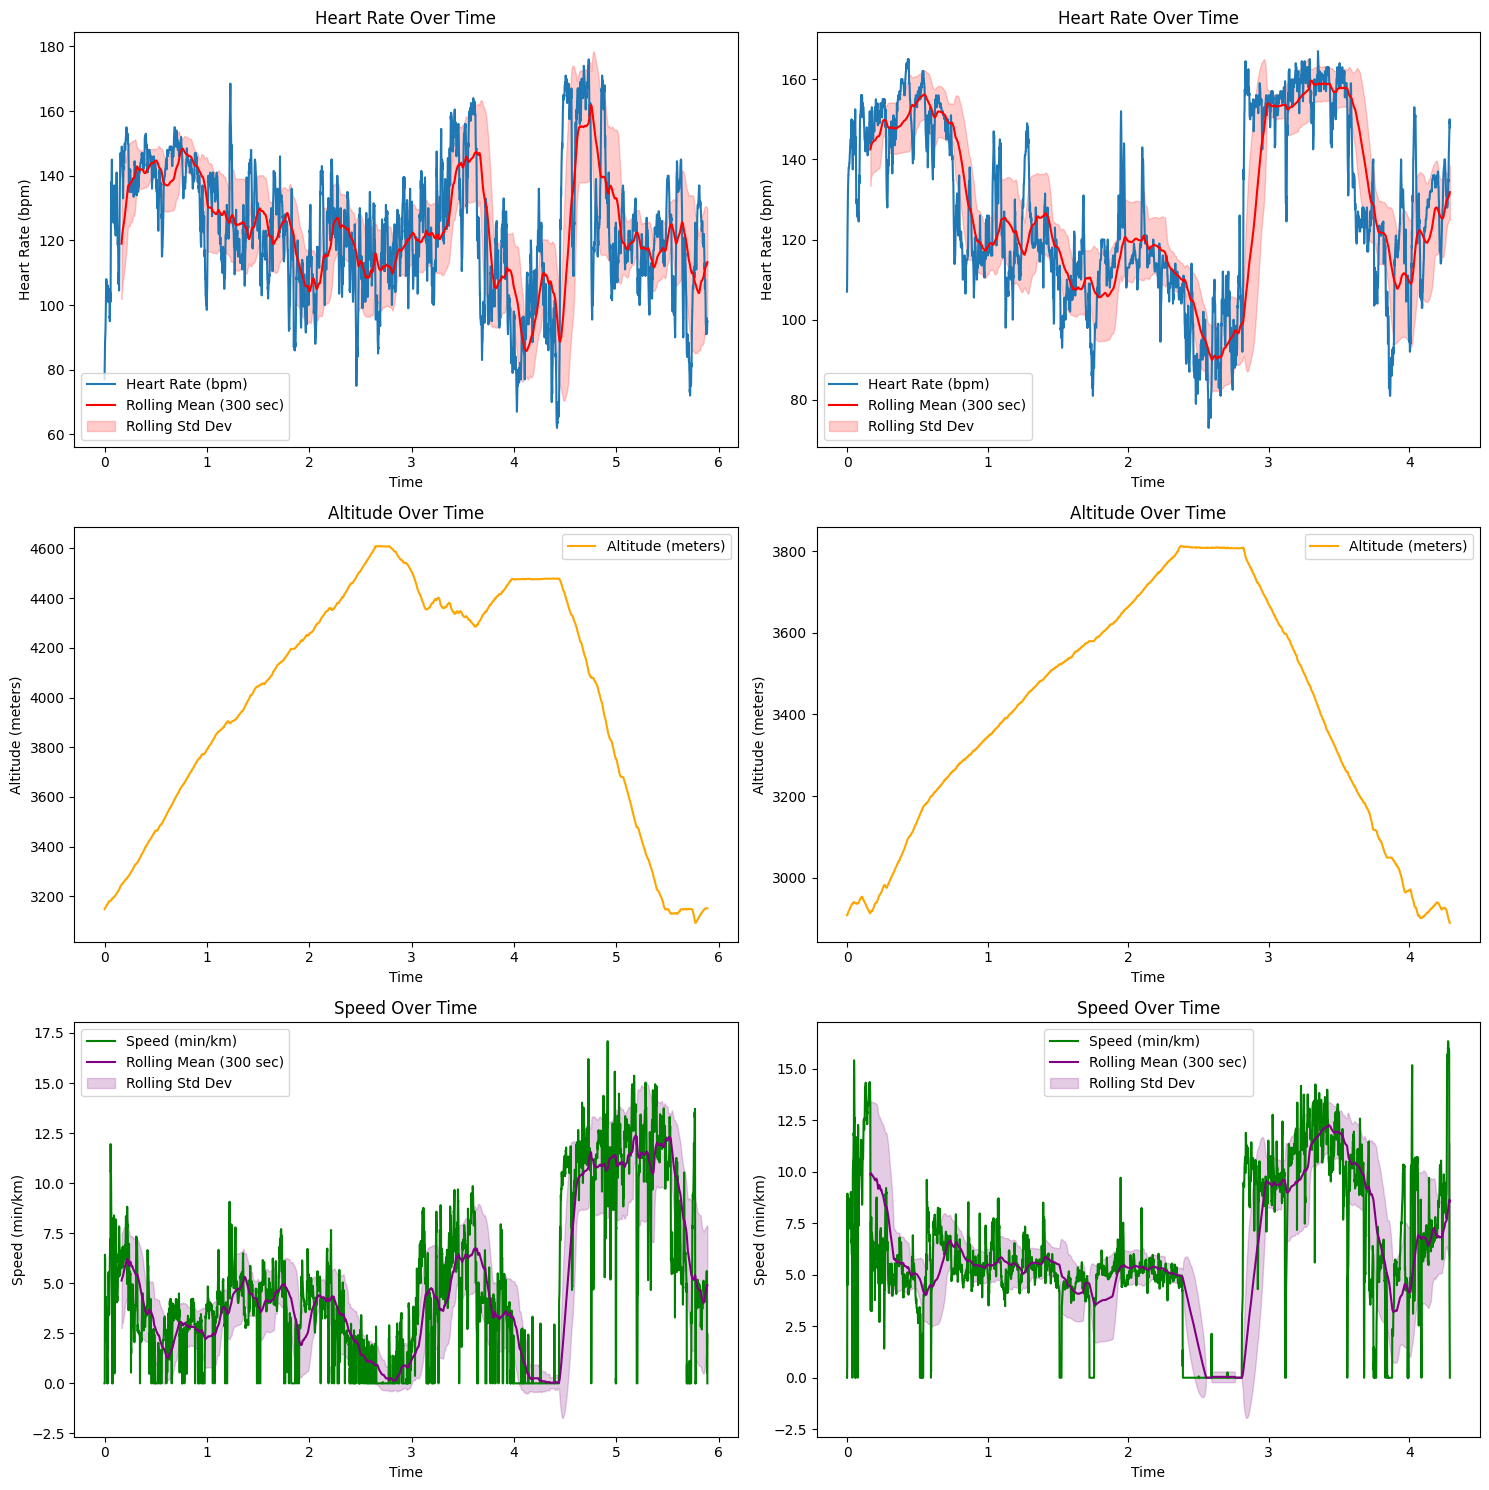

In [6]:
# Function to plot time series data for a single training session
def plot_time_series(df, axes):
    # Convert duration from seconds to hours for x-axis
    time_hours = df["duration"] / 3600

    # Plot heart rate over time
    # Calculate rolling mean and standard deviation for heart rate
    hr_index = 0
    hr_window = 300
    hr_rolling_mean = df["heartRate"].rolling(window=hr_window).mean()
    hr_rolling_std = df["heartRate"].rolling(window=hr_window).std()
    axes[hr_index].plot(time_hours, df["heartRate"], label="Heart Rate (bpm)")
    axes[hr_index].plot(
        time_hours,
        hr_rolling_mean,
        label=f"Rolling Mean ({hr_window} sec)",
        color="red",
    )
    axes[hr_index].fill_between(
        time_hours,
        hr_rolling_mean - hr_rolling_std,
        hr_rolling_mean + hr_rolling_std,
        color="red",
        alpha=0.2,
        label="Rolling Std Dev",
    )
    axes[hr_index].set_title("Heart Rate Over Time")
    axes[hr_index].set_xlabel("Time")
    axes[hr_index].set_ylabel("Heart Rate (bpm)")
    axes[hr_index].legend()

    # Plot altitude over time
    a_index = 1
    axes[a_index].plot(
        time_hours, df["altitude"], label="Altitude (meters)", color="orange"
    )
    axes[a_index].set_title("Altitude Over Time")
    axes[a_index].set_xlabel("Time")
    axes[a_index].set_ylabel("Altitude (meters)")
    axes[a_index].legend()

    # Plot speed over time
    s_index = 2
    s_window = 300
    s_rolling_mean = df["speed"].rolling(window=s_window).mean()
    s_rolling_std = df["speed"].rolling(window=s_window).std()
    axes[s_index].plot(time_hours, df["speed"], label="Speed (min/km)", color="green")
    axes[s_index].plot(
        time_hours,
        s_rolling_mean,
        label=f"Rolling Mean ({hr_window} sec)",
        color="purple",
    )
    axes[s_index].fill_between(
        time_hours,
        s_rolling_mean - s_rolling_std,
        s_rolling_mean + s_rolling_std,
        color="purple",
        alpha=0.2,
        label="Rolling Std Dev",
    )
    axes[s_index].set_title("Speed Over Time")
    axes[s_index].set_xlabel("Time")
    axes[s_index].set_ylabel("Speed (min/km)")
    axes[s_index].legend()


# Create a 3x3 subplot figure and plot time series for 3 random files

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
# axes = axes.flatten()

for i, sample_df in enumerate(sample_data_frames[:2]):
    print(sample_df)
    # print(f"Plotting {file_path}")
    plot_time_series(sample_df, axes[:, i])

plt.tight_layout()
plt.show()

#### Observaciones:

Es interesante ver que existe una cierta relación entre el ritmo cardíaco y la altura en el que se observa que el ritmo cardíaco tiene una cierta tendencia a disminuir que podría deberse al efecto de la altura o un efecto de la fatiga por el desnivel positivo acumulado. El ritmo cardíaco se recupera e incrementa inmediatamente durante los planos y bajadas. No se aprecia una correlación directa entre la velocidad y la altura aunque si hay cierta relación entre la velocidad y el ritmo cardiaco al inicio del ascenso o descenso.

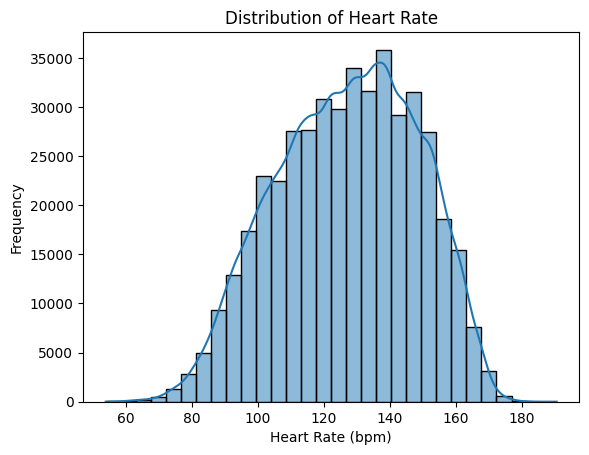

In [7]:
# Plot the distribution of heart rate
sns.histplot(data['heartRate'].dropna(), kde=True, bins=30)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

#### Observaciones

La mayoría de los entrenamientos fueron en zona 1 y 2 (100 a 130 BPMs para el individuo de estudio) y zona 4 - 5 ( > 158 BPMs para el individuo de estudio). No obstante en entrenamientos largos (fondos) y compentencias de larga duración, el ritmo cardíaco tiende a mantenerse en una zona aerobica por lo cual se observa que el ritmo cardiaco predomina alrededor de los 140 BPMs

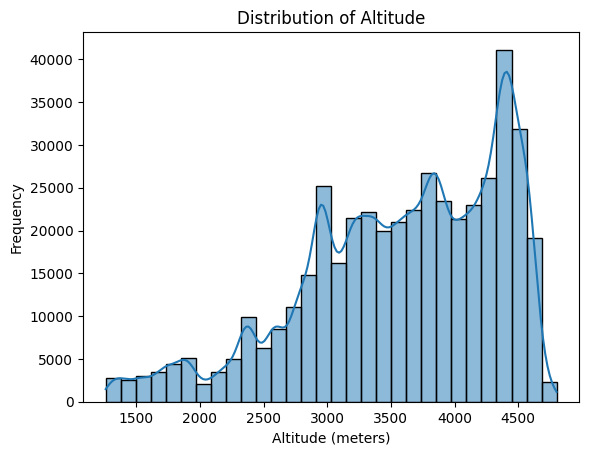

In [8]:
# Plot the distribution of altitude
sns.histplot(data['altitude'].dropna(), kde=True, bins=30)
plt.title('Distribution of Altitude')
plt.xlabel('Altitude (meters)')
plt.ylabel('Frequency')
plt.show()

#### Observaciones

Al residir en la ciudad de Quito, la mayoria de los entrenamientos largos fueron en altura a ~3000 metros de altura (Quito y sus alrededores principalmente) y ~4500 metros de altura (zona Integrales del Ruco Pichincha)

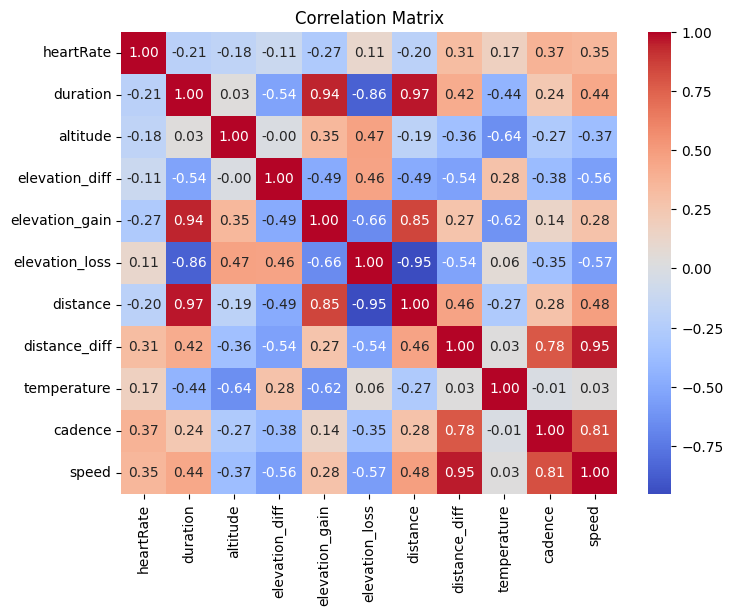

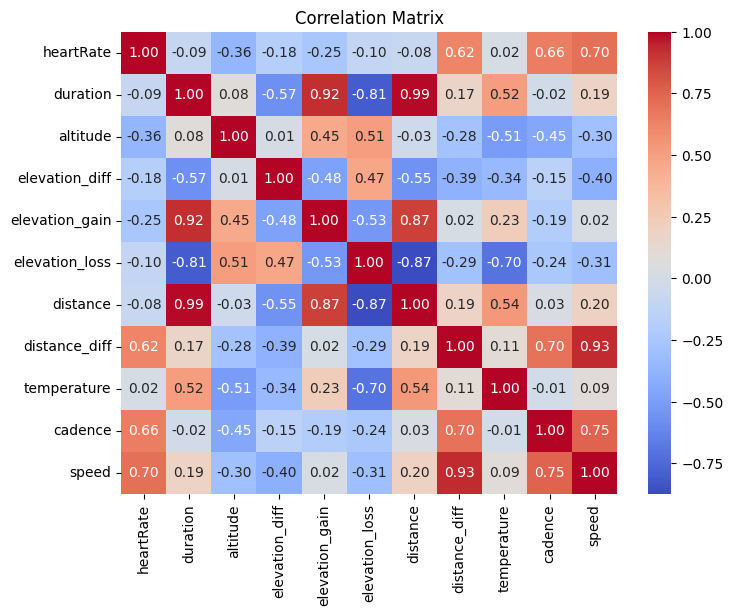

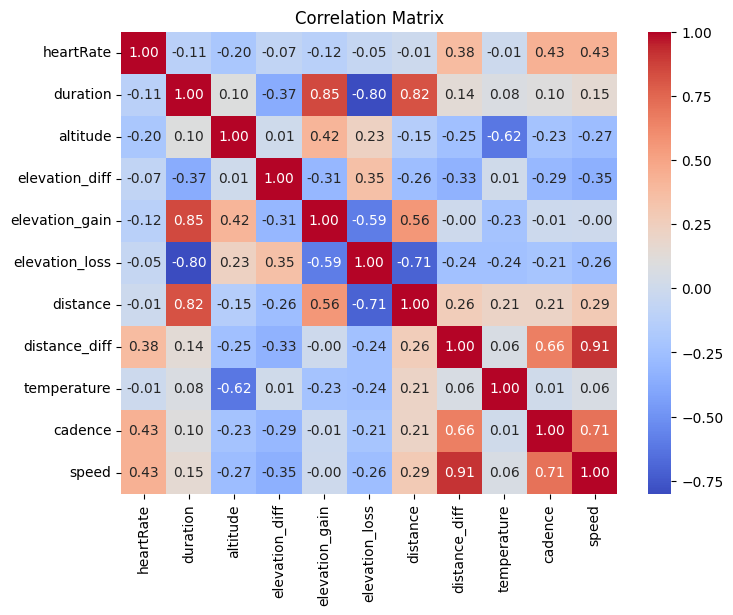

In [9]:
# Function to calculate and plot correlations between metrics
def plot_metric_correlations(df):
    # Calculate correlation matrix
    correlation_matrix = df.corr()

    # Plot heatmap of correlations
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

# Plot correlations for the first file in the directory
for i, sample_df in enumerate(sample_data_frames[:2]):
    plot_metric_correlations(sample_df.drop(columns=["timestamp", "date"]))

# Plot correlations for the aggregated dataframe
plot_metric_correlations(data.drop(columns=["timestamp", "date"]))


#### Observaciones

Se observa que hay una muy alta correlacion entre la distancia y la duración de la actividad, esto es de esperarse ya que la distancia recorrida siempre incrementa a medida que el corredor va avanzando en el tiempo, no obstante la differencia de distancia por segundo (`distance_diff`) tiene una baja correlación. Esta misma correlación se puede observar entre el desnivel positivo acumulado (`elevation_gain`) y la duración ya que usualmente la velocidad disminuye con el desnivel reduciendo la distancia que se avanza por cada intervalo de tiempo.

Debido a que el muestreo es de 1Hz es decir cada medida se toma por cada segundo, `distance_diff` puede interpretarse como una medida de velocidad, es por eso que también es de esperarse una alta correlación entre esta métrica y la velocidad (medida en min/km).

En menor medida se puede observar también que hay cierta correlación entre la cadencia y la velocidad (y por ende la diferencia de distancia). Una mayor cadencia no necesariamente implica mayor velocidad, pero en muchos casos si, si es que se mantiene un tamaño de zancada constante.

### Visualización con TSNE

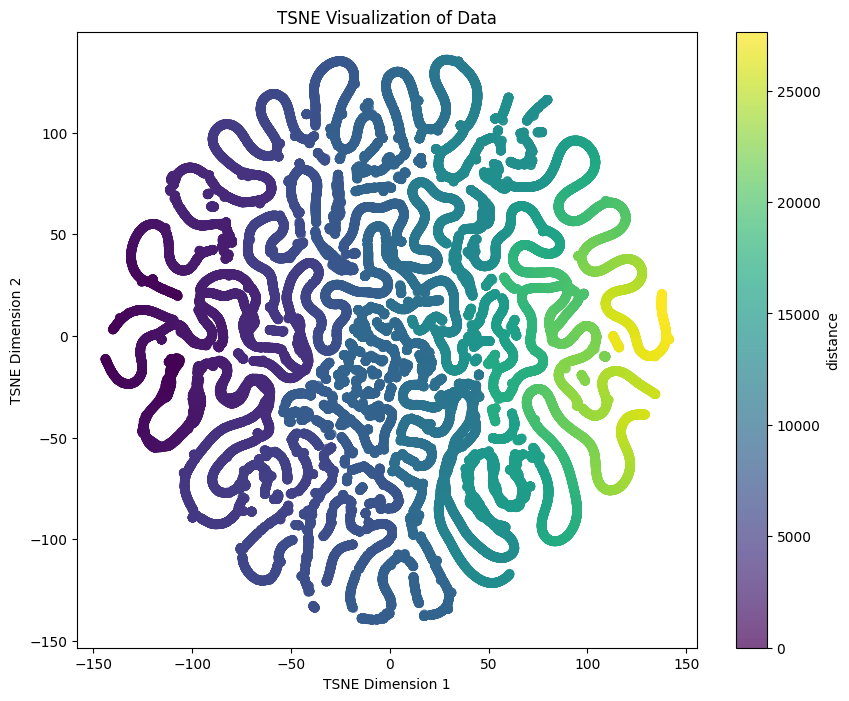

In [12]:
# About 90% of the code in this cell was generated with Copilot
# Prompt: Add a TSNE visualization for the data in 2 dimensions using distance_diff as the color.

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Select a subset of features for TSNE
tsne_features = ["heartRate", "altitude", "speed", "cadence", "distance"]
# Join a subset of the sample dataframes into a single dataframe
sample_data = pd.concat(sample_data_frames[:5], ignore_index=True)
tsne_data = sample_data[tsne_features].dropna()

# Apply TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_results = tsne.fit_transform(tsne_data)

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    tsne_results[:, 0],
    tsne_results[:, 1],
    c=tsne_data["distance"],
    cmap="viridis",
    alpha=0.7,
)
plt.colorbar(scatter, label="distance")
plt.title("TSNE Visualization of Data")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.show()

In [ ]:
%pip install tslearn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 5.7 MB/s eta 0:00:00a 0:00:01


#### Observaciones:

Por temas de tiempo de ejecución se realizó solo en subconjunto de datos. De todas maneras no se observa grupos muy definidos, posiblemente debido a que no se toma en cuenta la dependencia de las muestras sobre los muestreos anteriores.

No obstante, existe una investigación titulada [m-TSNE: A Framework for Visualizing High-Dimensional Multivariate Time Series](https://export.arxiv.org/pdf/1708.07942v1.pdf) en la que utiliza una métrica de distancia para la similaridad de los datos en un dataset de series de tiempo multivariable.

In [ ]:
# About 90% of code Generated with ChatGPT using the following prompt:
# "Add a m-TSNE visualization for the data in 2 dimensions using DTW distance as the metric."
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tslearn.metrics import dtw
from tqdm import tqdm

mtsne_features = ["heartRate", "altitude", "speed", "cadence"]
# Using only one training session for m-TSNE for execution time reasons
mtsne_data = sample_data_frames[0].drop(columns=['date'])
mtsne_data = mtsne_data[mtsne_features].values
labels = sample_data_frames[0]["distance"].values

# Step 1: Compute pairwise distance matrix using DTW
n = mtsne_data.shape[0]
distance_matrix = np.zeros((n, n))

print("Computing DTW distance matrix (this may take time)...")
for i in tqdm(range(n)):
    for j in range(i + 1, n):
        dist = dtw(mtsne_data[i], mtsne_data[j])
        distance_matrix[i, j] = dist
        distance_matrix[j, i] = dist


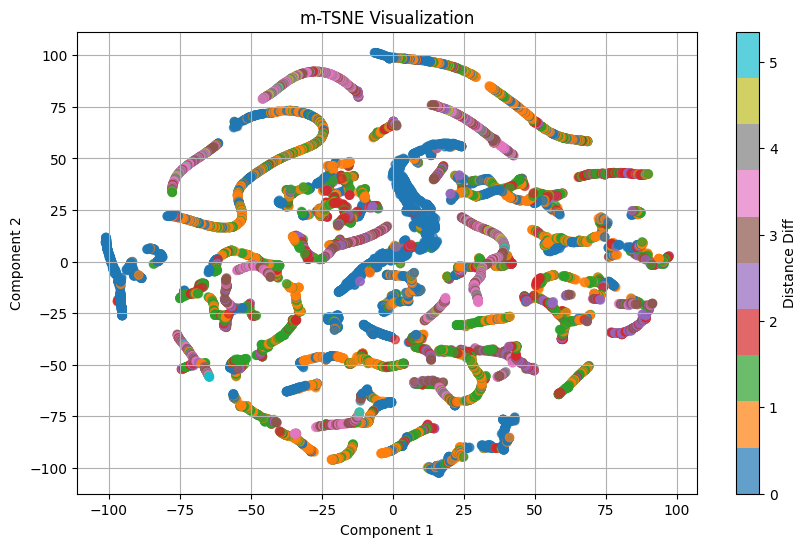

In [ ]:
# Step 2: Apply t-SNE with precomputed distance matrix
tsne = TSNE(n_components=2, metric="precomputed", init='random', random_state=42)
embedding = tsne.fit_transform(distance_matrix)

# Step 3: Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    embedding[:, 0], embedding[:, 1], c=labels, cmap="tab10", alpha=0.7
)
plt.colorbar(scatter, label="Distance")
plt.title("m-TSNE Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


#### Observaciones:

Se puede observar una representación visual con clusters mas separados de los datos aunque el costo computacional de la matriz de distancias es muy alto en este caso.

## Feature Selection (Filter)

En ésta sección se implementará una técnica de feature selection utilizando `SelectKBest` y `GroupTimeSeriesSplit`.

### Lag Features

Es común en datasets de series de tiempo trabajar con *Lag Features* que es una técnica para incorporar en las muestras información sobre los eventos del pasado que consiste en crear nuevos features desplazando la linea del tiempo un cierto intervalo. Ésto permite usar modelos convencionales para hacer predicciones sobre el dataset.

In [14]:
# Partially generated by copilot autocomplete feature
# No prompts were used
import math

# Create feature lags
def create_feature_lags(df, feature, lag=1, periods=1):
    """
    Create lagged features for a given feature in the DataFrame.
    """
    if periods == 1:
        df[f"{feature}_lag_{lag}"] = df[feature].shift(lag)
    else:
        df[f"{feature}_lag_{lag}"] = (
            df[feature]
            .shift(periods * (lag - 1) + 1)
            .rolling(window=periods)
            .mean()
        )
    # Fill NaN values with the mean of the feature
    df[f"{feature}_lag_{lag}"].fillna(df[feature].mean(), inplace=True)
    return df


# Create lagged features for heart rate, elevantion_diff, cadence, and temperature
data_lags = data.copy()
for lag in range(1, 11):
    data_lags = create_feature_lags(data_lags, "heartRate", lag, 60)
    data_lags = create_feature_lags(data_lags, "elevation_diff", lag, 60)
    data_lags = create_feature_lags(data_lags, "cadence", lag, 60)
    data_lags = create_feature_lags(data_lags, "temperature", lag, 60)

# Check the dimensions of the new DataFrame
print(data_lags.shape)

(445949, 53)


### Conjuntos de entrenamiento, validación y prueba

Luego de crear los feature lags, es necesario dividir el dataset en entrenamiento, validación y pruebas. Primero separando un conjunto de datos para las pruebas posteriores. Y luego realizar las divisiones correspondientes sobre el conjunto de datos restante. En este caso los datos estan agrupados por cada uno de los entrenamientos pero también cada entrenamiento corresponde a un conjunto de series de tiempo por lo que se necesitan considerar los dos casos. La clase `GroupTimeSeriesSplit` de la libreria [`mlxtend`](https://rasbt.github.io/mlxtend/user_guide/evaluate/GroupTimeSeriesSplit/) implementa lo necesario para poder llevar a cabo este proceso

In [ ]:
%pip install mlxtend --quiet

In [15]:
# Ensure there are no NaN values in the DataFrame. Fill with 0
data_lags.fillna(0, inplace=True)

# Divide by unique dates into test and train sets
# Keep the corresponding training session groups
# Only 2025 sessions will be used for ultimate model testing
from datetime import datetime

# Convert the comparison string to a datetime.date object
comparison_date = datetime.strptime("2025-01-01", "%Y-%m-%d").date()

train_val_data = data_lags[data_lags["date"] < comparison_date]
test_data = data_lags[data_lags["date"] >= comparison_date]

# Ensure the data is sorted by date and duration
train_val_data.sort_values(by=["date", "duration"], inplace=True)
test_data.sort_values(by=["date", "duration"], inplace=True)

<ipython-input-15-29044d1bf4ed>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_val_data.sort_values(by=["date", "duration"], inplace=True)
<ipython-input-15-29044d1bf4ed>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.sort_values(by=["date", "duration"], inplace=True)


Se procede a llevar a cabo la selección de features usando `SelectKBest` con distintos valores de `k` y usando `mutual_info_regression` como métrica de score.

Scikit-learn provee la clase [`TimeSeriesSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) que incorpora un mecanismo de validación cruzada para conjuntos de datos correspondientes a series de tiempo. Desafortunadamente, la naturaleza de los datos no permite utilizar esta clase directamente ya que cada sesión de entrenamiento es diferente una de otra.

Afortunadamente, la libreria `mlxtend` contiene la clase [GroupTimeSeriesSplit](https://rasbt.github.io/mlxtend/user_guide/evaluate/GroupTimeSeriesSplit/) que es compatible con scikit-learn y permite la agrupación adecuada de los conjuntos de series de tiempo

In [16]:
# Code partially generated with ChatGPT and Copilot assistance
# Prompt:   "Use https://rasbt.github.io/mlxtend/user_guide/evaluate/GroupTimeSeriesSplit/
#           to implement feature selection with scikit-learn using SelectKBest
#           with mutual_info_regression."

# Code was updated to implement a pipeline and cross_val_score
# which wasn't initially suggested by chatGPT

import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from mlxtend.evaluate.time_series import GroupTimeSeriesSplit, plot_splits
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import Pipeline

# Extract X and y datasets for training
# Filter train_val_data to test with smaller dataset (last years only) for time sake
train_val_data_f = train_val_data[
    train_val_data["date"] > datetime.strptime("2024-01-01", "%Y-%m-%d").date()
]
X = train_val_data_f.drop(columns=["timestamp", "date", "distance_diff", "distance"])
y = train_val_data_f["distance"]
# encode date as consecutive integers
dates = pd.to_datetime(train_val_data_f["date"])
groups = pd.factorize(dates)[0]
print(groups)


[0 0 0 ... 7 7 7]


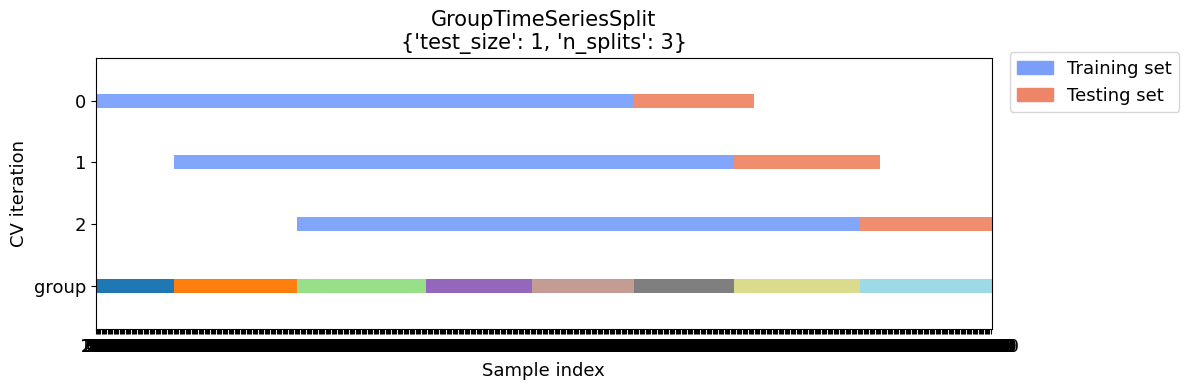

Evaluating k values: [29, 32, 35, 38, 41, 44]
Evaluating k=29...
[CV] END ....................... score: (test=-134496098.785) total time= 1.6min
[CV] END ........................ score: (test=-25642393.360) total time= 1.6min
[CV] END ........................ score: (test=-46000543.835) total time= 1.6min
Evaluating k=32...
[CV] END ....................... score: (test=-133761361.544) total time= 1.7min
[CV] END ........................ score: (test=-25551826.558) total time= 1.8min
[CV] END ........................ score: (test=-46603525.059) total time= 1.8min
Evaluating k=35...
[CV] END ....................... score: (test=-135892815.756) total time= 1.9min
[CV] END ........................ score: (test=-25441719.662) total time= 2.0min
[CV] END ........................ score: (test=-47438894.681) total time= 1.9min
Evaluating k=38...
[CV] END ....................... score: (test=-139214667.158) total time= 2.0min
[CV] END ........................ score: (test=-25809072.009) total 

In [17]:
# Group-aware time series split
# Set the test size to 20% of the unique groups
test_size = int(0.2 * len(dates.unique()))
# Only 3 split for the sake of time
cv_args = {"test_size": test_size, "n_splits": 3}
plot_splits(X, y, groups, **cv_args)
gtscv = GroupTimeSeriesSplit(**cv_args)

k_scores = {}
k_results = {}

# The Pipeline...
pipeline = Pipeline(
    [
        # ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("feature_selection", SelectKBest(score_func=mutual_info_regression)),
        (
            "model",
            RandomForestRegressor(min_samples_split=100, max_depth=15, random_state=42),
        ),
    ]
)

# Iterate over different values of k for feature selection
k_values = range(X.shape[1] - 20, X.shape[1] - 4, 3)
print(f"Evaluating k values: {list(k_values)}")
for k in k_values:
    print(f"Evaluating k={k}...")
    scores = []
    selected_features = []

    pipeline.set_params(feature_selection__k=k)
    scores = cross_val_score(
        pipeline, X, y, groups=groups, cv=gtscv, scoring="neg_mean_squared_error", verbose=3
    )
    # k_results = cross_validate(
    #     pipeline, X, y, groups=groups, cv=gtscv, verbose=3, return_estimator=True
    # )

    # Store results
    k_scores[k] = scores


In [ ]:
# Select best k value
best_k = max(k_scores, key=lambda k: np.mean(k_scores[k]))
best_score = np.mean(k_scores[best_k])
print(f"Best k value: {best_k} with score: {best_score:.2f}")

Best k value: 32 with score: -68650383.19


### Observaciones:

El tiempo de ejecución es considerablemente alto si es que se considera todo el dataset y un mayor numero de folds asi como varios valores de k.

Para simplificar el proceso y reducir el tiempo de ejecución, se tomó un subconjunto de los datos, asi como menos opciones de evaluación para k y el numero de folds se redujo de 3 a 5

El mejor valor de k encontrado fue de 32 con los parámetros dados

## Comparación de estadística de 2 técnicas de ML

Se van a comparar 2 técnicas de ML para el conjunto de datos:

- Regresión Lineal Regularizada
- NN con TFT (Temporal Fusion Transformers)

### Regresión Lineal Regularizada

#### Librerias requeridas

In [ ]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import GroupTimeSeriesSplit
from sklearn.pipeline import Pipeline
# from sklearn.model_selection import RepeatedKFold

#### Preparación de datos

In [ ]:
# Extract X and y datasets for training
# Filter train_val_data to test with smaller dataset (last year only) for time sake
# train_val_data_s = train_val_data[train_val_data["date"] > datetime.strptime("2024-01-01", "%Y-%m-%d").date()]
X = train_val_data.drop(columns=["timestamp", "date", "distance_diff", "distance"])
y = train_val_data["distance"]
# According to GroupTimeSeriesSplit documentation, the groups should be sequential
dates = pd.to_datetime(train_val_data["date"])
groups = pd.factorize(dates)[0]
X_test = test_data.drop(columns=["timestamp", "date", "distance_diff", "distance"])
y_test = test_data["distance"]
# dates_test = pd.to_datetime(test_data["date"])
# groups_test = pd.factorize(dates)[0]

#### Pipeline

In [ ]:
lr_pipeline = Pipeline([
    # ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ("feature_selection", SelectKBest(score_func=mutual_info_regression, k=best_k)),
    ('ridge', Ridge(max_iter=1000, random_state=42)),
])

#### Optimización de hyperparámetros

Se utilizará `GroupTimeSeriesSplit` en lugar de `RepeatedKFold` por el tipo de problema.

In [ ]:
param_grid = {"ridge__alpha": np.logspace(-3, 2, 5)}
print("CV Params:", param_grid)
test_size = int(0.2 * len(dates.unique()))
cv_args = {"test_size": test_size, "n_splits": 10}
gtscv = GroupTimeSeriesSplit(**cv_args)

grid = GridSearchCV(
    lr_pipeline,
    param_grid,
    cv=gtscv,
    scoring="neg_mean_squared_error",
    verbose=3,
    return_train_score=True,
)
grid.fit(X, y, groups=groups)

print("Best parameters found:", grid.best_params_)
print("Best score:", grid.best_score_)

CV Params: {'ridge__alpha': array([1.00000000e-03, 1.77827941e-02, 3.16227766e-01, 5.62341325e+00,
       1.00000000e+02])}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[CV 1/10] END ridge__alpha=0.001;, score=(train=-7500550.590, test=-25338487.163) total time= 1.2min
[CV 2/10] END ridge__alpha=0.001;, score=(train=-7287329.948, test=-23950498.870) total time= 1.2min
[CV 3/10] END ridge__alpha=0.001;, score=(train=-6940894.347, test=-25811455.493) total time= 1.2min
[CV 4/10] END ridge__alpha=0.001;, score=(train=-6931917.164, test=-27954242.373) total time= 1.2min
[CV 5/10] END ridge__alpha=0.001;, score=(train=-8793647.434, test=-42579476.865) total time= 1.2min
[CV 6/10] END ridge__alpha=0.001;, score=(train=-8840434.654, test=-50262258.420) total time= 1.2min
[CV 7/10] END ridge__alpha=0.001;, score=(train=-8351187.371, test=-54999903.062) total time= 1.2min
[CV 8/10] END ridge__alpha=0.001;, score=(train=-7884821.545, test=-53047462.251) total time= 1.2min
[CV 9/10] END ridge__alpha=0.001;, score=(train=-9689415.369, test=-38369111.763) total time= 1.2min
[CV 10/10] END ridge__alpha=0.001;, score=(train=-9610390.238, test=-37468476.911) total ti

### Visualización de resultados

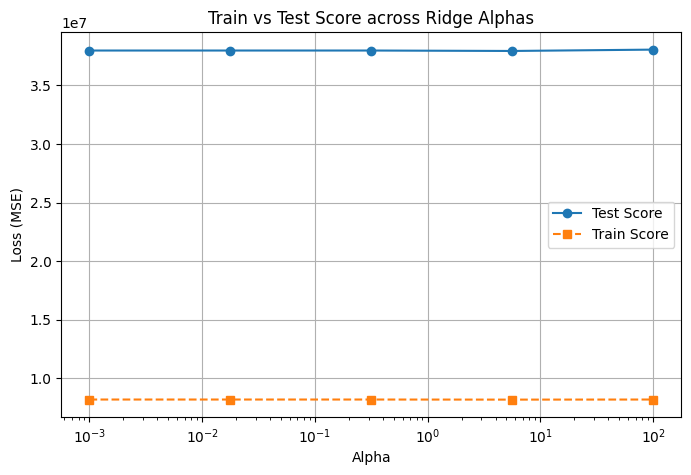

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract alphas and scores
results = grid.cv_results_
alphas = [params['ridge__alpha'] for params in results['params']]

# Convert negative MSE to positive for interpretability (optional)
mean_test_scores = -np.array(results['mean_test_score'])
std_test_scores = np.array(results['std_test_score'])

mean_train_scores = -np.array(results['mean_train_score'])
std_train_scores = np.array(results['std_train_score'])

# Plot
plt.figure(figsize=(8, 5))
plt.plot(alphas, mean_test_scores, label='Test Score', marker='o')
plt.plot(alphas, mean_train_scores, label='Train Score', marker='s', linestyle='--')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Loss (MSE)')
plt.title('Train vs Test Score across Ridge Alphas')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Use the best parameter (e.g., ridge__alpha from GridSearchCV)
best_alpha = grid.best_params_['ridge__alpha']
lr_pipeline.set_params(ridge__alpha=best_alpha)

# Define train sizes (fractions or absolute numbers)
train_sizes = np.linspace(0.1, 1.0, 10)

# Reuse the same cross-validator
train_sizes, train_scores, test_scores = learning_curve(
    lr_pipeline,
    X, y,
    groups=groups,
    train_sizes=train_sizes,
    cv=gtscv,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    return_times=False
)

# Convert negative MSE to positive
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Train Score')
plt.plot(train_sizes, test_scores_mean, 's--', label='Test Score')

plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'grid' is not defined

#### Entrenamiento y Evaluación

In [ ]:
# Use best alpha to set the pipeline estimator
lr_pipeline.set_params(ridge__alpha=grid.best_params_["ridge__alpha"])
lr_pipeline.fit(X, y)

# Evaluate the model
y_pred = lr_pipeline.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {lr_mse:.2f}")

Mean Squared Error: 12335562.30


### Neural Network con TFT (Temporal Fusion Transformers)

Existen varios modelos y técnicas útiles que se pueden aplicar sobre problemas de series de tiempo (LSTM, ARIMA, entre otros). No obstante, [An In-Depth Exploration of Temporal Fusion Transformers for Time Series Forecasting](https://medium.com/ai-simplified-in-plain-english/an-in-depth-exploration-of-temporal-fusion-transformers-for-time-series-forecasting-91e74040a079) explora las ventajas de usar Temporal Fusion Transformers en cuanto a precisión e interpretabilidad en datos secuenciales dado su mecanismo de atención a los sucesos por lo que se procederá a implementar con pytorch usando ésta técnica

#### Librerias requeridas

In [ ]:
%pip install pytorch-lightning --quiet
%pip install pytorch-forecasting --quiet
%pip install optuna --quiet
%pip install optuna[visualization] --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 5.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 24.3 MB/s eta 0:00:00[?25l     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/231.9 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 11.1 MB/s eta 0:00:00


In [ ]:
# About 80% of the code was generated with ChatGPT and Copilot assistance
# Prompt: "Add a pytorch-lightning model using the Temporal Fusion Transformer (TFT) from pytorch-forecasting."
# Prompt: "Implement hyperparameter optimization for the pytorch-lightning tft model"

import lightning.pytorch as pl
import torch.nn as nn
import torch
from torch.utils.data import DataLoader
# from pytorch_lightning import Trainer
from lightning.pytorch import Trainer
from pytorch_forecasting import TimeSeriesDataSet, Baseline, metrics
from pytorch_forecasting.data import NaNLabelEncoder
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_forecasting.data.encoders import TorchNormalizer
from pytorch_forecasting.models.temporal_fusion_transformer import TemporalFusionTransformer
import optuna


#### Dataset

In [ ]:
# 0   timestamp       445949 non-null  datetime64[ns]
#  1   heartRate       445902 non-null  float64
#  2   duration        445949 non-null  float64
#  3   altitude        445949 non-null  float64
#  4   elevation_diff  445949 non-null  float64
#  5   elevation_gain  445949 non-null  float64
#  6   elevation_loss  445949 non-null  float64
#  7   distance        445937 non-null  float64
#  8   distance_diff   445949 non-null  float64
#  9   temperature     445949 non-null  float64
#  10  cadence         445939 non-null  float64
#  11  speed           445939 non-null  float64
#  12  date            445949 non-null  object

# --- Configuration ---
min_prediction_length = 1
max_prediction_length = 6  # Forecast horizon
min_encoder_length = 12
max_encoder_length = 24  # History length
batch_size = 64

# --- Group-aware TimeSeriesDataSet ---
# data.set_index("duration", inplace=True)
data["duration"] = data["duration"].astype(int)
training_cutoff = data["duration"].max() - max_prediction_length

training = TimeSeriesDataSet(
    data[lambda x: x["duration"] <= training_cutoff],
    time_idx="duration",
    target="distance",
    group_ids=["date"],
    max_encoder_length=max_encoder_length,
    min_encoder_length=min_encoder_length,
    min_prediction_length=min_prediction_length,
    max_prediction_length=max_prediction_length,
    # static_categoricals=[],
    # time_varying_known_categoricals=[],
    time_varying_known_reals=[
        "duration",
        "heartRate",
        "altitude",
        "elevation_diff",
        "elevation_gain",
        "elevation_loss",
        "temperature",
        "cadence",
        "speed",
    ],
    time_varying_unknown_reals=["distance"],
    target_normalizer=TorchNormalizer(),
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True,
)

# Create validation set
validation = TimeSeriesDataSet.from_dataset(training, data, predict=True, stop_randomization=True)

# DataLoaders
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)


### Model and Hyperparameter Optimization

Para la optimización de parámetros se utilizó la libreria `optuna` que implementa un algoritmo de busqueda con enfoque probabilistico y compatible con la libreria utilizada. También es posible utilizar `Tuner` [6] provisto por pytorch pero `optuna` parece ser mejor opción para optimizar multiples parametros.

In [ ]:
def objective(trial):
    # Suggest hyperparameters
    hidden_size = trial.suggest_int("hidden_size", 8, 64)
    attention_head_size = trial.suggest_int("attention_head_size", 1, 4)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    
    # Define model
    model = TemporalFusionTransformer.from_dataset(
        training,
        hidden_size=hidden_size,
        attention_head_size=attention_head_size,
        dropout=dropout,
        learning_rate=learning_rate,
        loss=metrics.RMSE(),
        log_interval=0,
        reduce_on_plateau_patience=2,
    )

    # Callbacks
    early_stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")

    # Trainer
    trainer = Trainer(
        max_epochs=20,
        accelerator="auto",
        limit_train_batches=500,
        callbacks=[early_stop],
        enable_model_summary=False,
        logger=False,
    )

    trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

    val_loss = trainer.callback_metrics["val_loss"].item()
    return val_loss

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("Best trial:")
print(study.best_trial.params)

[I 2025-05-12 17:27:16,884] A new study created in memory with name: no-name-c5bb193c-cdca-4b5f-8590-4544b54cb0e0
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU core

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-12 17:35:34,245] Trial 0 finished with value: 764.5689086914062 and parameters: {'hidden_size': 10, 'attention_head_size': 2, 'dropout': 0.4704743235305976, 'learning_rate': 0.003993824376065215}. Best is trial 0 with value: 764.5689086914062.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda),

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-12 17:42:49,736] Trial 1 finished with value: 519.8544921875 and parameters: {'hidden_size': 12, 'attention_head_size': 2, 'dropout': 0.11027601234664736, 'learning_rate': 0.0005625633851137193}. Best is trial 1 with value: 519.8544921875.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), use

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-12 17:50:05,859] Trial 2 finished with value: 680.4268798828125 and parameters: {'hidden_size': 38, 'attention_head_size': 1, 'dropout': 0.2696198282979161, 'learning_rate': 0.0012535693494217844}. Best is trial 1 with value: 519.8544921875.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), u

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-12 18:00:24,789] Trial 3 finished with value: 418.26885986328125 and parameters: {'hidden_size': 34, 'attention_head_size': 2, 'dropout': 0.1894602780354472, 'learning_rate': 0.00024063232984383831}. Best is trial 3 with value: 418.26885986328125.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cu

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-12 18:06:41,037] Trial 4 finished with value: 490.82293701171875 and parameters: {'hidden_size': 47, 'attention_head_size': 2, 'dropout': 0.4331770229525512, 'learning_rate': 0.008182292556583298}. Best is trial 3 with value: 418.26885986328125.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-12 18:13:01,693] Trial 5 finished with value: 911.220947265625 and parameters: {'hidden_size': 10, 'attention_head_size': 3, 'dropout': 0.35046752074386756, 'learning_rate': 0.003903925942933713}. Best is trial 3 with value: 418.26885986328125.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-12 18:20:21,180] Trial 6 finished with value: 613.4795532226562 and parameters: {'hidden_size': 51, 'attention_head_size': 1, 'dropout': 0.19804023350134858, 'learning_rate': 0.00019907984487133688}. Best is trial 3 with value: 418.26885986328125.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cu

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-12 18:26:39,943] Trial 7 finished with value: 709.7900390625 and parameters: {'hidden_size': 47, 'attention_head_size': 3, 'dropout': 0.44721561239558505, 'learning_rate': 0.0004974056510736142}. Best is trial 3 with value: 418.26885986328125.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda),

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-12 18:35:01,174] Trial 8 finished with value: 611.2453002929688 and parameters: {'hidden_size': 60, 'attention_head_size': 4, 'dropout': 0.38419940297035426, 'learning_rate': 0.0004962239501416242}. Best is trial 3 with value: 418.26885986328125.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cud

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[I 2025-05-12 18:40:09,386] Trial 9 finished with value: 963.106201171875 and parameters: {'hidden_size': 17, 'attention_head_size': 1, 'dropout': 0.42550689421835874, 'learning_rate': 0.0018124113280209148}. Best is trial 3 with value: 418.26885986328125.


Best trial:
{'hidden_size': 34, 'attention_head_size': 2, 'dropout': 0.1894602780354472, 'learning_rate': 0.00024063232984383831}


In [ ]:
from optuna.visualization import plot_parallel_coordinate

fig = plot_parallel_coordinate(study)
fig.show()

### Re-train with best parameters

In [ ]:
best_params = study.best_trial.params

# Create a logger
logger = TensorBoardLogger("tb_logs", name="tft_model")

tft_best = TemporalFusionTransformer.from_dataset(
    training,
    **best_params,
    loss=metrics.RMSE(),
)
early_stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")
trainer = Trainer(
    max_epochs=30,
    accelerator="auto",
    limit_train_batches=500,
    callbacks=[early_stop],
    enable_model_summary=False,
    logger=logger,
)
trainer.fit(
    tft_best, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader
)

# Display tensorboard
!tensorboard --logdir tb_logs

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# Load best model
# best_model_path = trainer.checkpoint_callback.best_model_path
# best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

# Predictions on validation set
y_true = torch.cat([y[0] for x, y in iter(val_dataloader)]).to("cuda:0")  # Move to GPU
y_pred = tft_best.predict(val_dataloader) #.to("cuda:0")  # Ensure predictions are on GPU

# Calculate MSE
import torch.nn.functional as F

mse = F.mse_loss(y_pred, y_true)
print(f"MSE: {mse.item():.4f}")

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

MSE: 187115.8750


### Comparación de modelos

In [ ]:
# About 80% code Generated with ChatGPT
# Prompt: "Add a Wilcoxon test to compare the performance of the sklearn linear regression and pytorch-lightning models."

import pandas as pd
import numpy as np
from mlxtend.evaluate import GroupTimeSeriesSplit
from sklearn.metrics import mean_squared_error
from scipy.stats import wilcoxon

from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer
from lightning.pytorch import Trainer
import torch

# Sample assumptions
df = train_val_data.copy()
print(df.shape)
# encode date as consecutive integers
dates = pd.to_datetime(df["date"])
df["group"] = pd.factorize(dates)[0]
df["duration"] = df["duration"].astype(int)
df.drop(columns=["timestamp", "date", "distance_diff"], inplace=True)
group_column = "group"
time_column = "duration"
target_column = "distance"

# Sort by group + time
df = df.sort_values([group_column, time_column])

# Set up splitter
cv_args = {"test_size": test_size, "n_splits": 5}
gtscv = GroupTimeSeriesSplit(**cv_args)

tft_errors = []
lr_errors = []

# Prepare data
groups = df[group_column].values
X = df.drop(columns=[target_column])
y = df[target_column].values

for train_idx, test_idx in gtscv.split(X, y, groups):
    df_train = df.iloc[train_idx]
    df_test = df.iloc[test_idx]

    # 1. --- sklearn regression model ---
    lr_pipeline = Pipeline([
        # ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ("feature_selection", SelectKBest(score_func=mutual_info_regression, k=best_k)),
        ('ridge', Ridge(alpha=grid.best_params_["ridge__alpha"]))
    ])
    lr_pipeline.fit(df_train.drop(columns=[target_column, group_column]), df_train[target_column])
    preds_rf = lr_pipeline.predict(df_test.drop(columns=[target_column, group_column]))
    error_rf = mean_squared_error(df_test[target_column], preds_rf, squared=False) #RMSE
    lr_errors.append(error_rf)

    # 2. --- TFT model ---
    # Prepare TimeSeriesDataSet
    # Remove lag features
    df_train = df_train.drop(
        columns=[
            f"{col}_lag_{lag}"
            for col in ["heartRate", "elevation_diff", "cadence", "temperature"]
            for lag in range(1, 11)
        ]
    )
    df_test = df_test.drop(
        columns=[
            f"{col}_lag_{lag}"
            for col in ["heartRate", "elevation_diff", "cadence", "temperature"]
            for lag in range(1, 11)
        ]
    )
    df_train = df_train.sort_values([group_column, time_column])
    df_test = df_test.sort_values([group_column, time_column])
    training = TimeSeriesDataSet(
        df_train,
        time_idx=time_column,
        target=target_column,
        group_ids=[group_column],
        max_encoder_length=max_encoder_length,
        min_encoder_length=min_encoder_length,
        min_prediction_length=min_prediction_length,
        max_prediction_length=max_prediction_length,
        # static_categoricals=[],
        # time_varying_known_categoricals=[],
        time_varying_known_reals=[
            "duration",
            "heartRate",
            "altitude",
            "elevation_diff",
            "elevation_gain",
            "elevation_loss",
            "temperature",
            "cadence",
            "speed",
        ],
        time_varying_unknown_reals=[target_column],
        target_normalizer=GroupNormalizer(
            groups=[group_column], transformation="softplus"
        ),
        add_relative_time_idx=True,
        add_target_scales=True,
        add_encoder_length=True,
        allow_missing_timesteps=True,
    )

    # validation = TimeSeriesDataSet.from_dataset(training, df_test)
    validation = TimeSeriesDataSet(
        df_test,
        time_idx=time_column,
        target=target_column,
        group_ids=[group_column],
        max_encoder_length=max_encoder_length,
        min_encoder_length=min_encoder_length,
        min_prediction_length=min_prediction_length,
        max_prediction_length=max_prediction_length,
        # static_categoricals=[],
        # time_varying_known_categoricals=[],
        time_varying_known_reals=[
            "duration",
            "heartRate",
            "altitude",
            "elevation_diff",
            "elevation_gain",
            "elevation_loss",
            "temperature",
            "cadence",
            "speed",
        ],
        time_varying_unknown_reals=[target_column],
        target_normalizer=training.target_normalizer, # Use normalizer from training
        add_relative_time_idx=True,
        add_target_scales=True,
        add_encoder_length=True,
        allow_missing_timesteps=True,
        # Pass the categorical encoders from the training dataset
        categorical_encoders=training.categorical_encoders,
        scalers=training.scalers # Pass the scalers from the training dataset
    )

    train_dl = training.to_dataloader(train=True, batch_size=32)
    val_dl = validation.to_dataloader(train=False, batch_size=32)

    early_stop = EarlyStopping(monitor="val_loss", patience=3, mode="min")
    trainer = Trainer(
        max_epochs=30,
        accelerator="auto",
        limit_train_batches=1000,
        callbacks=[early_stop],
        enable_model_summary=False,
        logger=False,
    )
    # Ensure the model is reset before training
    tft_best = TemporalFusionTransformer.from_dataset(
        training,
        **best_params,
        loss=metrics.RMSE(),
    )
    trainer.fit(tft_best, train_dl, val_dl)

    preds_tft = tft_best.predict(val_dl)
    actuals = torch.cat([y[0] for x, y in iter(val_dl)])

    # error_tft = mean_squared_error(actuals.cpu().numpy(), preds_tft.cpu().numpy())
    error_tft = trainer.callback_metrics["val_loss"]
    tft_errors.append(error_tft)

In [ ]:
# 3. --- Wilcoxon Test ---
print(tft_errors)
print(lr_errors)

# Plot tft_errors and lr_errors
plt.figure(figsize=(10, 5))
plt.plot(tft_errors, label="TFT Errors", color="b")
plt.plot(lr_errors, label="LR Errors", color="r")
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.title("Model Errors Comparison")
plt.legend()
plt.show()

# Perform Wilcoxon signed-rank test
if len(lr_errors) == len(tft_errors) and len(lr_errors) > 1:
    stat, p_value = wilcoxon(lr_errors, tft_errors)
    print(f"Wilcoxon test statistic: {stat:.4f}")
    print(f"Wilcoxon test p-value: {p_value:.4f}")

    # Interpret the result
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in performance between the two models.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference in performance between the two models.")
else:
    print("Not enough paired samples to perform Wilcoxon test.")

## Conclusiones

Los problemas de series de tiempo representa un reto por el tratamiento que deben tener los datos y por el cuidado que se debe tener al momento de realizar las validaciones correspondientes para evitar data leakage. Por un lado se tiene las series de tiempo en el que es importante validar con datos futuros. Por otro lado se tiene distintos registros correspondientes a distintos entrenamientos, cada uno de estos grupos debe estar en un conjunto distinto, entrenamiento o validacion para evitar una contaminacion de datos. Esto puede volverse aun mas complejo se agrega data correspondiente a individuos adicionales.

A pesar de que un problema de series de tiempo puede parecer computacionalmente simple al tener pocas caracteristicas sobre las cuales trabajar y un numero limitado de sesiones de la actividad deportiva realizada, al agregar todas estas sesiones, el dataset crece significativamente, llegando a los cientos de miles de registros en total. Adicionalmente, si se agregan características adicionales de lag y polinomiales puede derivar en un dataset significativamente grande que puede aumentar el tiempo de ejecución de manera significativa.

La implementación modular de los distintos componentes tanto para la preparación del dataset, como para la definición del modelo y optimización de hiperparámetros es clave para poder orquestar el código y adaptarlo a los distintos problemas que se puedan sucitar. Esta modularidad incluso permite la combinación de distintas librerías para tareas como la evaluación de modelos. El seguir las mejores prácticas a la hora de implementar las distintas soluciones ayuda a que el código tenga una mejor organización.

En éste proyecto se tuvo la oportunidad de evaluar 2 modelos distintos (regresión líneal regularizada y redes neuronales) usando 2 distintas librerias (scikit-learn y pytorch). Es interesante contrastar las diferencias entre los modelos y las librerias. Por un lado la regresión lineal es más simple a nivel de modelo pero puede tener más complejidades a la hora de procesar el dataset (requiriendo features adicionales) o requerir mas procesos dentro del pipeline. Por otro lado, las redes neuronales requieren un mejor entendimiento de la arquitectura subyacente sobre todo a la hora de escoger los hiperparámetros a optimizar. A nivel de librerias, scikit-learn ofrece un conjunto de librerias muy completo y con una API que facilita su uso, sin embargo puede no proveer ciertas opciones para problemas más complejos como grupos para `TimeSeriesSplit`. Pytorch y todo su ecosistema en cambio ofrece una mayor versatilidad y flexibilidad a cambio de adherirse a ciertos estandares como el uso de interfaces a través de las clases base de Lightning y la aplicación de un paradigma orientado a objetos para la modularidad y extensibilidad de los componentes.

Para el presente proyecto se tomó una sola variable de predicción como es la distancia que es fácil de explicar si se tiene el tiempo en intervalos de tamaño fijo, un poco pensado en la intuición de que se quisiera saber la distancia que se podría recorrer dadas ciertas condiciones. Sin embargo, ésto pudiese extenderse a muchas otras variables de interés. En realidad, la distancia es un parámetro estático y conocido, asi también la altura y sus métricas asociadas como desnivel tanto positivo como negativo (esto usualmente viene dado por un archivo GPX que se comparte antes de un entrenamiento o competencia). Por esta razón, la variable de interés real es el tiempo y habría que considerar para una futura investigación la posibilidad de hacer un remuestreo que permita tener la distancia en intervalos fijos para poder considerar como un problema de serie pero basado en la distancia. Asi mismo, se pueden introducir otras variables que pueden cambiar la dinámica del modelo como el nivel de terreno, condiciones climáticas, en que punto comer, en que punto hidratarse y nivel de esfuerzo percibido.

## Referencias

- [1] Nguyen et al., [m-TSNE: A Framework for Visualizing High-Dimensional Multivariate Time Series](https://export.arxiv.org/pdf/1708.07942v1.pdf)
- [2] Sebastian Raschka, [GroupTimeSeriesSplit: A scikit-learn compatible version of the time series validation with groups](https://rasbt.github.io/mlxtend/user_guide/evaluate/GroupTimeSeriesSplit/)
- [3] Lim et al., [Temporal Fusion Transformers for Interpretable Multi-horizon Time Series Forecasting](https://arxiv.org/pdf/1912.09363v3)
- [4] Dmitry Labazkin, [Advanced Group Time Series Validation](https://medium.com/@labdmitriy/advanced-group-time-series-validation-bb00d4a74bcc) 
- [5] Mario Dagrada, [ML time series forecasting the right way](https://medium.com/data-science/ml-time-series-forecasting-the-right-way-cbf3678845ff)
- [6] [Demand forecasting with the Temporal Fusion Transformer](https://pytorch-forecasting.readthedocs.io/en/stable/tutorials/stallion.html)

